In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [134]:
##############
# Setup Lists
##############

R = [103.9, 104, 104.1, 104.2, 104.3, 104.4, 104.5, 104.6]
R_c = 103.8
R_fixed = [((x - R_c)/R_c) for x in R]
R_log = np.log10(R_fixed)
V_mean = []

#####################
# Update V_mean List
#####################

def updateVMean(df):
    data = pd.read_csv(df)
    v = data["RMS Voltage"].iloc[-1]
    V_mean.append(v)
    print(f"I have added {v} to the list")


#############################
# Update V_mean for each CSV
#############################

#updateVMean("SSO-103_8.csv")
updateVMean("SSO-103_9.csv")
updateVMean("SSO-104.csv")
updateVMean("SS0-104_1.csv")
updateVMean("SS0-104_1.csv")
updateVMean("SSO-104_3.csv")
updateVMean("SSO-104_4.csv")
updateVMean("SSO-104_5.csv")
updateVMean("SSO-104_6.csv")


print(f"Critical Resistance: {R_c},\nMean Voltage: {V_mean},\nR Fixed: {R_fixed}")
V_log = np.log10(V_mean)
print(R_log.shape, V_log.shape)

I have added 0.6429669600000001 to the list
I have added 0.88327583 to the list
I have added 1.0229681000000002 to the list
I have added 1.0229681000000002 to the list
I have added 1.2602544000000002 to the list
I have added 1.5515857 to the list
I have added 1.6498176 to the list
I have added 1.8130229 to the list
Critical Resistance: 103.8,
Mean Voltage: [0.6429669600000001, 0.88327583, 1.0229681000000002, 1.0229681000000002, 1.2602544000000002, 1.5515857, 1.6498176, 1.8130229],
R Fixed: [0.0009633911368016236, 0.0019267822736031104, 0.002890173410404597, 0.0038535645472062207, 0.004816955684007708, 0.005780346820809331, 0.0067437379576108175, 0.007707129094412304]
(8,) (8,)


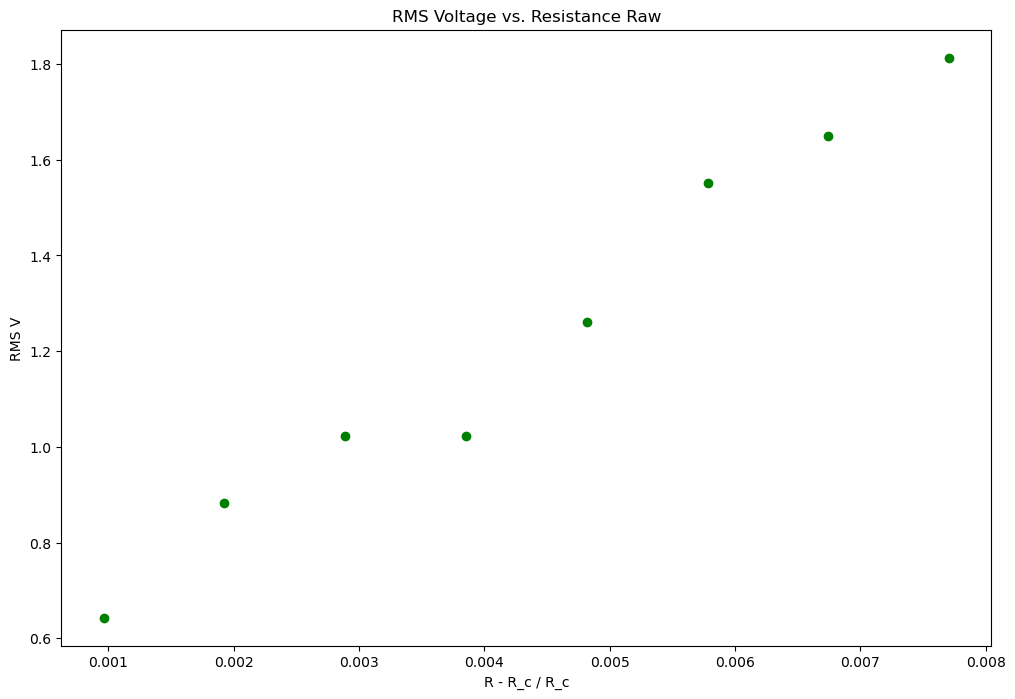

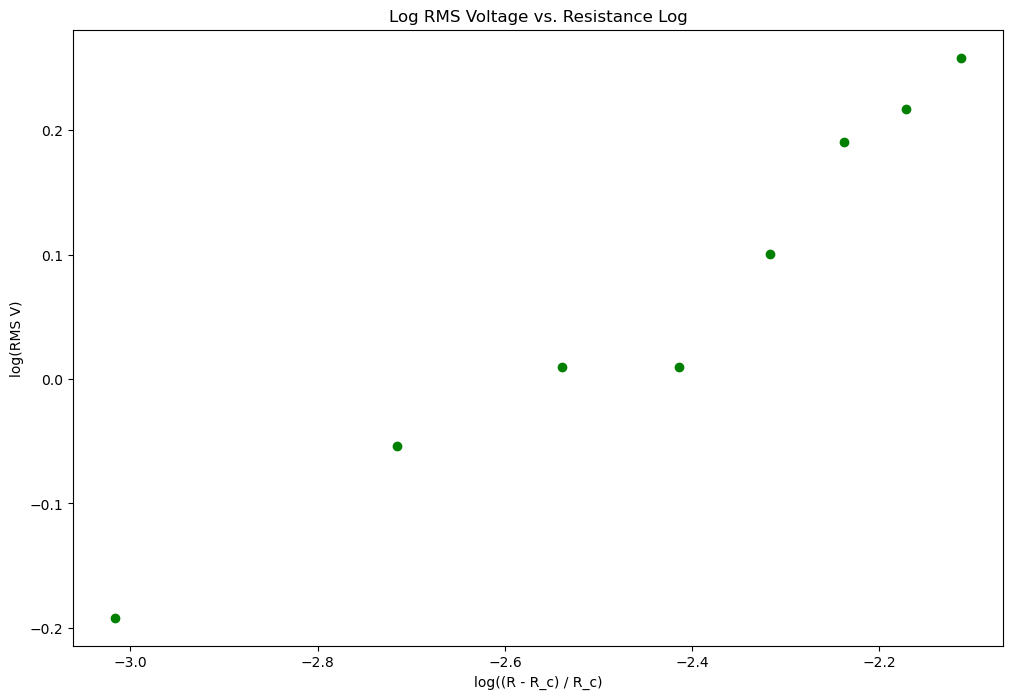

In [135]:
############
# Plot Raw
############

plt.figure(figsize=(12,8))
plt.xlabel("R - R_c / R_c")
plt.ylabel("RMS V")
plt.title("RMS Voltage vs. Resistance Raw")
plt.scatter(R_fixed, V_mean, c='g')
plt.show()


############
# Plot Log
############
plt.figure(figsize=(12,8))
plt.xlabel("log((R - R_c) / R_c)")
plt.ylabel("log(RMS V)")
plt.title("Log RMS Voltage vs. Resistance Log")
plt.scatter(R_log, V_log, c='g')
plt.show()

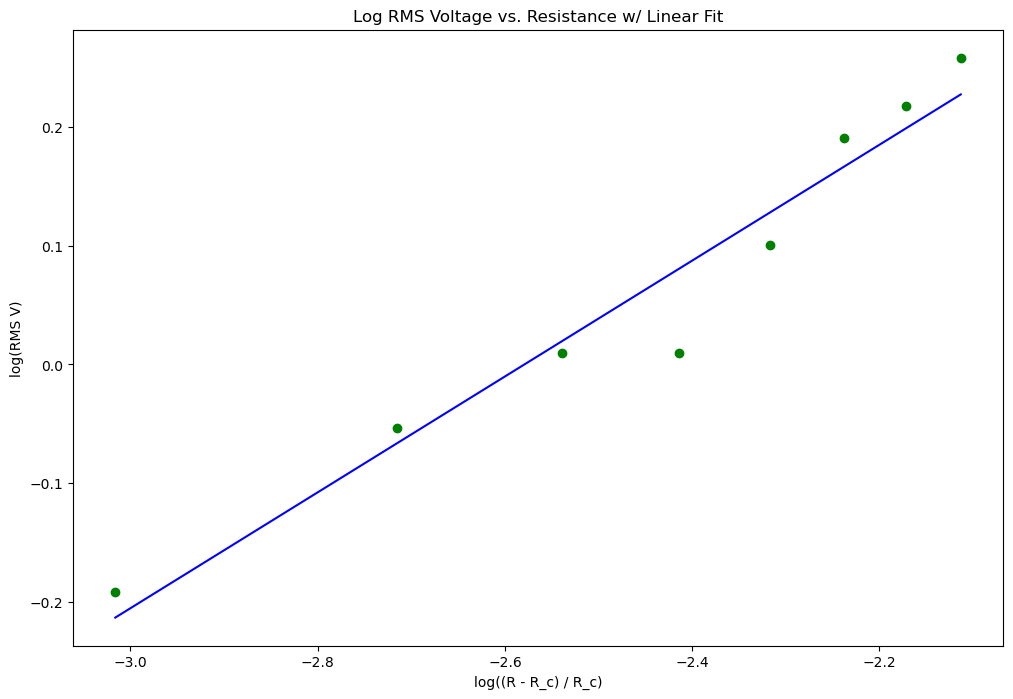

In [139]:
#################
# Lin Regression
#################

slope, intercept, r_value, p_value, std_err = linregress(R_log, V_log)
lin_fit = intercept + slope*R_log


###############
# Plot Log Fit
###############

plt.figure(figsize=(12,8))
plt.xlabel("log((R - R_c) / R_c)")
plt.ylabel("log(RMS V)")
plt.title("Log RMS Voltage vs. Resistance w/ Linear Fit")
plt.scatter(R_log, V_log, c='g')
plt.plot(R_log, lin_fit, c='b')
plt.show()

In [137]:
print(f"Intercept: {intercept},\nSlope: {slope}")

Intercept: 1.2583451455049686,
Slope: 0.48789440277988144
